Vrush <br> Assignement : 4

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
import statsmodels.tsa.vector_ar.irf as irf

Read in the series 'A.csv', 'B.csv', 'C.csv'

In [240]:
a = pd.read_csv('A.csv',names = ['0','a'])
b = pd.read_csv('B.csv',names = ['0','b'])
c = pd.read_csv('C.csv',names = ['0','c'])

In [241]:
a = a.drop(a.columns[0], axis=1)
b = b.drop(b.columns[0], axis=1)
c = c.drop(c.columns[0], axis=1)


In [242]:
a.head()

,a
0,0.000000
1,0.000000
2,0.000000
3,-1.690123
4,-1.219096


In [243]:
b.head()

,b
0,0.000000
1,0.000000
2,0.000000
3,-0.809757
4,-0.412396


In [244]:
c.head()

,c
0,0.000000
1,0.000000
2,0.000000
3,0.420383
4,-2.200924


Plot the data and observe

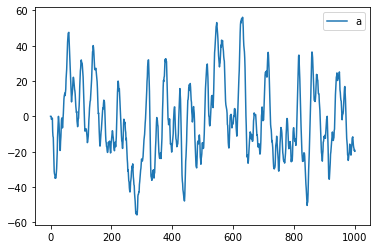

In [245]:
a.plot(kind='line')
plt.show()

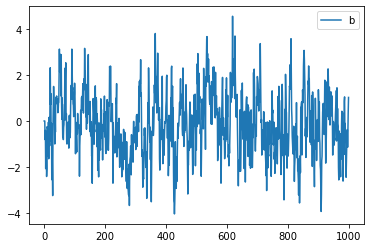

In [246]:
b.plot(kind='line')
plt.show()

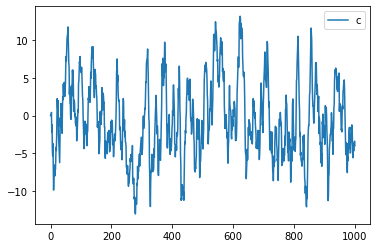

In [247]:
c.plot(kind='line')
plt.show()

DataFrame the series and create a VAR model

In [248]:
data = pd.concat([a,b,c],axis = 1)
data.head()

,a,b,c
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,-1.690123,-0.809757,0.420383
4,-1.219096,-0.412396,-2.200924


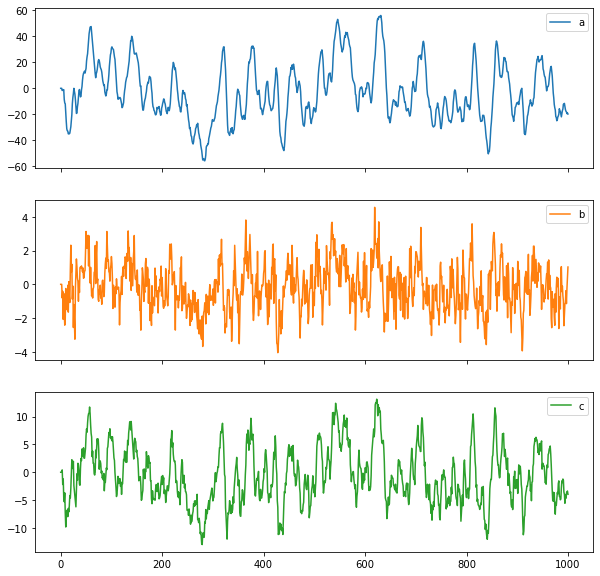

In [249]:
data.plot(subplots = True, layout = (3,1), figsize = (10,10))
plt.show()

Determine optimum lag order (p) by Lag order selection

In [250]:
#make a VAR model
model = sm.tsa.VAR(data)

#lag order selection
lag_order = model.select_order(15)

print()
print(lag_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        8.543       8.558       5130.       8.548
1       0.2942      0.3538       1.342      0.3169
2     0.02842*     0.1326*      1.029*    0.06806*
3      0.03858      0.1875       1.039     0.09521
4      0.04735      0.2409       1.048      0.1210
5      0.05770      0.2959       1.059      0.1483
6      0.06947      0.3524       1.072      0.1771
7      0.08551      0.4131       1.089      0.2101
8      0.09425      0.4665       1.099      0.2358
9      0.09863      0.5155       1.104      0.2572
10      0.1017      0.5633       1.107      0.2773
11      0.1135      0.6197       1.120      0.3060
12      0.1233      0.6742       1.131      0.3328
13      0.1264      0.7220       1.135      0.3529
14      0.1348      0.7750       1.144      0.3783
15      0.1412      0.8261       1.152      0.4017
------------------------------

Here, lowest AIC, BIC, FPE and HQIC are in VAR order 2. So, from lag order selection we can say that the optimum lag order is <b>order 2<b>

Model fit at optimum lag order and get results

In [251]:
#Fitting the model
results = model.fit(2)
print()
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, May, 2023
Time:                     20:10:20
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.147602
Nobs:                     999.000    HQIC:                 0.0836614
Log likelihood:          -4253.77    FPE:                    1.04546
AIC:                    0.0444572    Det(Omega_mle):         1.02379
--------------------------------------------------------------------
Results for equation a
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.021783         0.032669           -0.667           0.505
L1.a          0.506941         0.029909           16.949           0.000
L1.b          0.019382         0.032241            0.601           0.548
L1.c          1.036460

Use results to find roots (number of roots = K*p) 

In [252]:
num_variables = data.shape[1]
nroots = num_variables * lag_order.aic #3*2
print()
print('Roots = ')
for i in range(0,nroots):
    print(results.roots[i])
print()
print('Moduli = ')
for i in range(0,nroots):
    print(np.absolute(results.roots[i]))


Roots = 
(-5.038357544055538-0j)
(-2.759800974641894+0.9514446080863089j)
(-2.759800974641894-0.9514446080863089j)
(1.295099712145593+0.24457126080238598j)
(1.295099712145593-0.24457126080238598j)
(1.1440798158181458-0j)

Moduli = 
5.038357544055538
2.91920336083166
2.91920336083166
1.3179902753852422
1.3179902753852422
1.1440798158181458


As, all moduli are greter than 1 we can conclude that the model <b>is stationary<b>

Also, none of the moduli is equal to 1 so that we can say that the model <b>is not cointegrated.<b>

If stationary: <br>
- Investigate Granger causality between series combinations (if any) 
- Use IRF plots to confirm your causality conclusions
- Order the variables (list series in decreasing order of exogeneity)

In [253]:
#making function which can do grangercausalitytests
def granger(d):
    grangercausalitytests(d,3)

In [254]:
#first a and b
d = data[['a','b']]
granger(d)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=393.1632, p=0.0000  , df_denom=997, df_num=1
ssr based chi2 test:   chi2=394.3462, p=0.0000  , df=1
likelihood ratio test: chi2=332.4257, p=0.0000  , df=1
parameter F test:         F=393.1632, p=0.0000  , df_denom=997, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=323.2239, p=0.0000  , df_denom=994, df_num=2
ssr based chi2 test:   chi2=649.6995, p=0.0000  , df=2
likelihood ratio test: chi2=500.4863, p=0.0000  , df=2
parameter F test:         F=323.2239, p=0.0000  , df_denom=994, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=362.4915, p=0.0000  , df_denom=991, df_num=3
ssr based chi2 test:   chi2=1095.1560, p=0.0000  , df=3
likelihood ratio test: chi2=739.1936, p=0.0000  , df=3
parameter F test:         F=362.4915, p=0.0000  , df_denom=991, df_num=3


The above results states that we can reject the null hypothesis that there is no Granger causality between the variables, and conclude that there is evidence to suggest that<b> there is a causal relationship between them(a precedes b).






Text(0.5, 1.0, 'a precedes b')

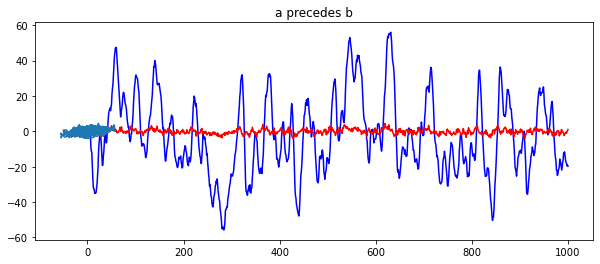

In [255]:
plt.figure(figsize = (10,4))
plt.plot(d['a'],color = 'b')
plt.plot(d['b'],color = 'r')
plt.plot(d['a'],d['b'])
plt.title('a precedes b')

In [256]:
# b and a
d = data[['b','a']]
granger(d)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0233  , p=0.0824  , df_denom=997, df_num=1
ssr based chi2 test:   chi2=3.0324  , p=0.0816  , df=1
likelihood ratio test: chi2=3.0278  , p=0.0818  , df=1
parameter F test:         F=3.0233  , p=0.0824  , df_denom=997, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1401  , p=0.8693  , df_denom=994, df_num=2
ssr based chi2 test:   chi2=0.2816  , p=0.8687  , df=2
likelihood ratio test: chi2=0.2816  , p=0.8687  , df=2
parameter F test:         F=0.1401  , p=0.8693  , df_denom=994, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4649  , p=0.2226  , df_denom=991, df_num=3
ssr based chi2 test:   chi2=4.4259  , p=0.2190  , df=3
likelihood ratio test: chi2=4.4161  , p=0.2199  , df=3
parameter F test:         F=1.4649  , p=0.2226  , df_denom=991, df_num=3


For the first number of lags (one), the results show that there is weak evidence of Granger causality between the two time series. The F-test statistic is 3.0233, with a p-value of 0.0824, which suggests that the null hypothesis (that the second time series does not Granger-cause the first time series) cannot be rejected at conventional significance levels.

For the second number of lags (two), the results show no evidence of Granger causality between the two time series. The F-test statistic is only 0.1401, with a p-value of 0.8693, which suggests that the null hypothesis cannot be rejected.

For the third number of lags (three), the results show weak evidence of Granger causality between the two time series. The F-test statistic is 1.4649, with a p-value of 0.2226, which suggests that the null hypothesis cannot be rejected at conventional significance levels.

In conclusion, the overall results suggest that there is <b>weak evidence of Granger causality between 'b' and 'a'(b precedes a), especially for the first and third number of lags. However, the evidence is not strong enough to draw definitive conclusions about the causal relationship between the two time series.<b>





Text(0.5, 1.0, 'b precedes a')

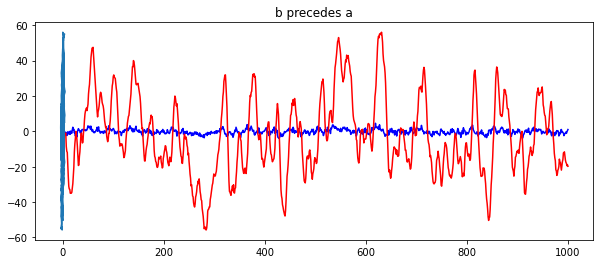

In [257]:
plt.figure(figsize = (10,4))
plt.plot(d['b'],color = 'b')
plt.plot(d['a'],color = 'r')
plt.plot(d['b'],d['a'])
plt.title('b precedes a')

In [258]:
# a and c
d = data[['a','c']]
granger(d)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10067.6216, p=0.0000  , df_denom=997, df_num=1
ssr based chi2 test:   chi2=10097.9153, p=0.0000  , df=1
likelihood ratio test: chi2=2406.7573, p=0.0000  , df=1
parameter F test:         F=10067.6216, p=0.0000  , df_denom=997, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2197.3041, p=0.0000  , df_denom=994, df_num=2
ssr based chi2 test:   chi2=4416.7139, p=0.0000  , df=2
likelihood ratio test: chi2=1688.6149, p=0.0000  , df=2
parameter F test:         F=2197.3041, p=0.0000  , df_denom=994, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1407.0788, p=0.0000  , df_denom=991, df_num=3
ssr based chi2 test:   chi2=4251.0533, p=0.0000  , df=3
likelihood ratio test: chi2=1656.7296, p=0.0000  , df=3
parameter F test:         F=1407.0788, p=0.0000  , df_denom=991, df_num=3


For the first number of lags (one), the results show strong evidence of Granger causality between the two time series. The F-test statistic is 10067.6216, with a p-value of 0.0000, which suggests that the null hypothesis (that the second time series does not Granger-cause the first time series) can be rejected at conventional significance levels.

For the second number of lags (two), the results also show strong evidence of Granger causality between the two time series. The F-test statistic is 2197.3041, with a p-value of 0.0000, which suggests that the null hypothesis can be rejected.

For the third number of lags (three), the results again show strong evidence of Granger causality between the two time series. The F-test statistic is 1407.0788, with a p-value of 0.0000, which suggests that the null hypothesis can be rejected.

In conclusion, the overall results strongly suggest that <b>there is Granger causality between 'a' and 'c'. The results are significant and consistent across different numbers of lags considered.






Text(0.5, 1.0, 'a precedes c')

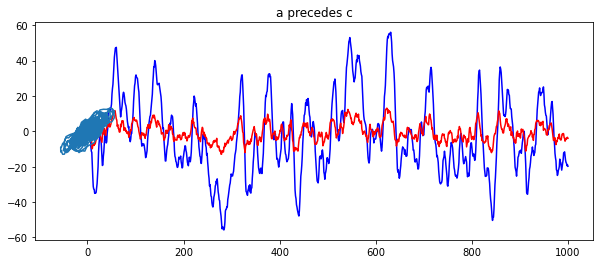

In [259]:
plt.figure(figsize = (10,4))
plt.plot(d['a'],color = 'b')
plt.plot(d['c'],color = 'r')
plt.plot(d['a'],d['c'])
plt.title('a precedes c')

In [260]:
# c and a
d = data[['c','a']]
granger(d)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=51.6394 , p=0.0000  , df_denom=997, df_num=1
ssr based chi2 test:   chi2=51.7948 , p=0.0000  , df=1
likelihood ratio test: chi2=50.4980 , p=0.0000  , df=1
parameter F test:         F=51.6394 , p=0.0000  , df_denom=997, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.3214 , p=0.0000  , df_denom=994, df_num=2
ssr based chi2 test:   chi2=30.7969 , p=0.0000  , df=2
likelihood ratio test: chi2=30.3318 , p=0.0000  , df=2
parameter F test:         F=15.3214 , p=0.0000  , df_denom=994, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4616  , p=0.7092  , df_denom=991, df_num=3
ssr based chi2 test:   chi2=1.3945  , p=0.7068  , df=3
likelihood ratio test: chi2=1.3935  , p=0.7071  , df=3
parameter F test:         F=0.4616  , p=0.7092  , df_denom=991, df_num=3


At lag 1: There is strong evidence of Granger causality from the first time series to the second time series, as indicated by the significant F-tests and p-values that are all less than 0.05.

At lag 2: There is still evidence of Granger causality from the first time series to the second time series, but it is not as strong as at lag 1. The F-tests and p-values are still significant, indicating that the first time series is a useful predictor of the second time series.

At lag 3: There is no evidence of Granger causality from the first time series to the second time series, as indicated by the non-significant F-tests and p-values that are all greater than 0.05.

Overall, the results suggest that <b>'c' Granger-causes 'a' at lags 1 and 2, but not at lag 3.<b>

Text(0.5, 1.0, 'c precedes a')

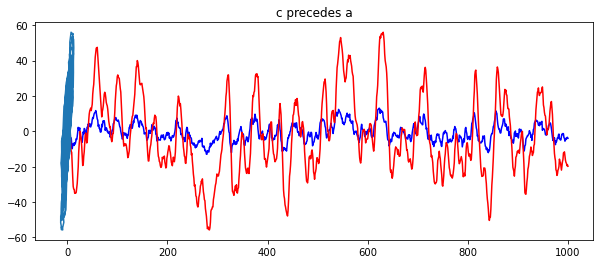

In [261]:
plt.figure(figsize = (10,4))
plt.plot(d['c'],color = 'b')
plt.plot(d['a'],color = 'r')
plt.plot(d['c'],d['a'])
plt.title('c precedes a')

In [262]:
# b and c
d = data[['b','c']]
granger(d)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.3966 , p=0.0001  , df_denom=997, df_num=1
ssr based chi2 test:   chi2=16.4459 , p=0.0001  , df=1
likelihood ratio test: chi2=16.3121 , p=0.0001  , df=1
parameter F test:         F=16.3966 , p=0.0001  , df_denom=997, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2007  , p=0.3014  , df_denom=994, df_num=2
ssr based chi2 test:   chi2=2.4135  , p=0.2992  , df=2
likelihood ratio test: chi2=2.4105  , p=0.2996  , df=2
parameter F test:         F=1.2007  , p=0.3014  , df_denom=994, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0388  , p=0.3745  , df_denom=991, df_num=3
ssr based chi2 test:   chi2=3.1383  , p=0.3708  , df=3
likelihood ratio test: chi2=3.1333  , p=0.3715  , df=3
parameter F test:         F=1.0388  , p=0.3745  , df_denom=991, df_num=3


results of the Granger causality tests, there is evidence to suggest that <b>'b' Granger-causes 'c' at lag 1, but not at lags 2 or 3</b>. The p-values for the F tests and the chi-squared tests are all less than 0.05 at lag 1, which means that the null hypothesis of no Granger causality can be rejected. However, the p-values for all of the tests are greater than 0.05 at lags 2 and 3, which means that the null hypothesis of no Granger causality cannot be rejected.

In other words, the past values of b provide statistically significant information about the future values of c at lag 1, but not at lags 2 or 3. This suggests that there is a causal relationship between the two variables, but that the relationship is only present at lag 1.



Text(0.5, 1.0, 'b precedes c')

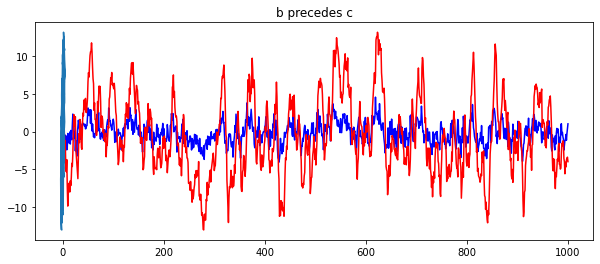

In [263]:
plt.figure(figsize = (10,4))
plt.plot(d['b'],color = 'b')
plt.plot(d['c'],color = 'r')
plt.plot(d['b'],d['c'])
plt.title('b precedes c')

In [264]:
# c and b
d = data[['c','b']]
granger(d)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1397.7032, p=0.0000  , df_denom=997, df_num=1
ssr based chi2 test:   chi2=1401.9089, p=0.0000  , df=1
likelihood ratio test: chi2=876.2638, p=0.0000  , df=1
parameter F test:         F=1397.7032, p=0.0000  , df_denom=997, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=831.4906, p=0.0000  , df_denom=994, df_num=2
ssr based chi2 test:   chi2=1671.3463, p=0.0000  , df=2
likelihood ratio test: chi2=982.2255, p=0.0000  , df=2
parameter F test:         F=831.4906, p=0.0000  , df_denom=994, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=512.2089, p=0.0000  , df_denom=991, df_num=3
ssr based chi2 test:   chi2=1547.4806, p=0.0000  , df=3
likelihood ratio test: chi2=934.4488, p=0.0000  , df=3
parameter F test:         F=512.2089, p=0.0000  , df_denom=991, df_num=3


Based on the results of the Granger causality tests, there is evidence to suggest that c Granger-causes b at lags 1, 2, and 3. The p-values for all of the tests are less than 0.05 at all lags, which means that the null hypothesis of no Granger causality can be rejected.

In other words, the past values of c provide statistically significant information about the future values of b at lags 1, 2, and 3. This suggests that there is a causal relationship between the two variables, and that the relationship is present at all lags.



Text(0.5, 1.0, 'c precedes b')

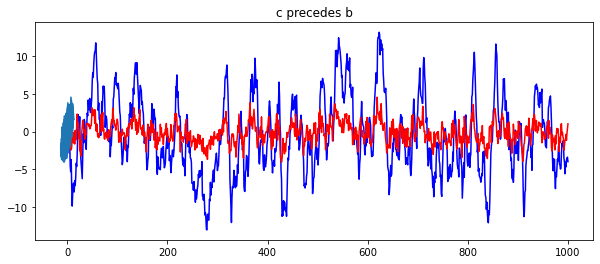

In [265]:
plt.figure(figsize = (10,4))
plt.plot(d['c'],color = 'b')
plt.plot(d['b'],color = 'r')
plt.plot(d['c'],d['b'])
plt.title('c precedes b')

Use IRF plots to confirm your causality conclusions

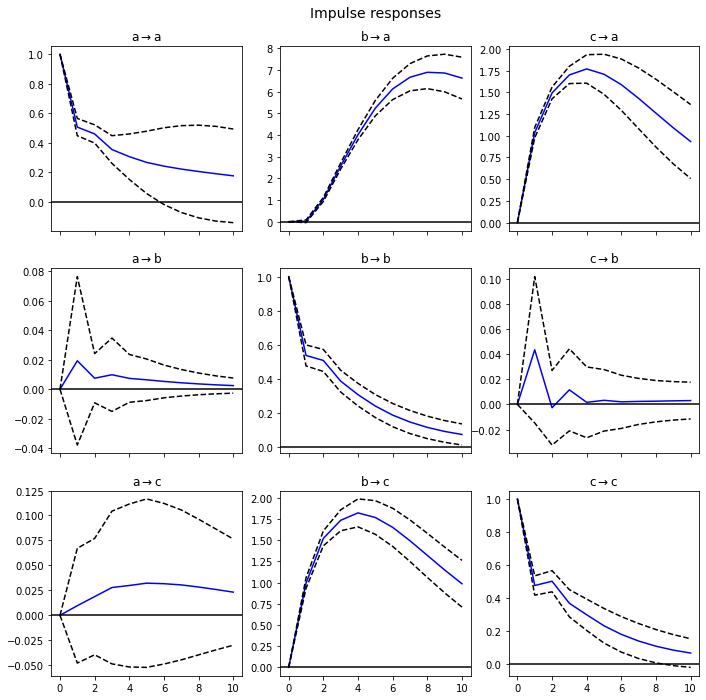

In [266]:
irf = results.irf(10)
irf.plot(orth=False)
plt.show()

Order the variables (list series in decreasing order of exogeneity)

In [267]:
corr_matrix = data.corr()
exogeneity = corr_matrix.apply(lambda x: np.mean(np.abs(x)))
exogeneity = exogeneity.sort_values(ascending=False)
exogeneity

c    0.790892
a    0.707191
b    0.625872
dtype: float64

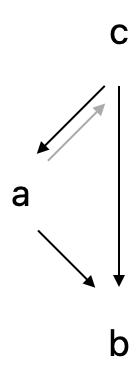

VAR model perform a dynamic forecast 10 steps forward and plot 


Lag order = 2

Forecasted values:
[[-1.94104410e+01  5.04002350e-01 -1.36318719e+00]
 [-1.69943125e+01  5.03089466e-01 -4.43433921e-01]
 [-1.34997379e+01  3.19574257e-01  3.24080432e-01]
 [-1.00331588e+01  2.28760694e-01  7.20049930e-01]
 [-6.82300567e+00  1.35018058e-01  8.92776504e-01]
 [-4.15803765e+00  6.64519809e-02  9.19556856e-01]
 [-2.07551096e+00  1.22564899e-02  8.48193104e-01]
 [-5.64917886e-01 -2.84486337e-02  7.24806312e-01]
 [ 4.42563899e-01 -5.85247133e-02  5.75955455e-01]
 [ 1.03319888e+00 -8.03906913e-02  4.21766860e-01]]


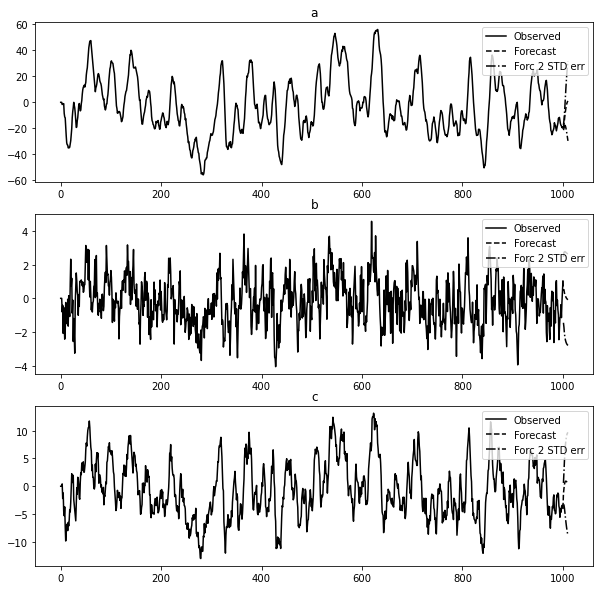

In [268]:
lag_order = results.k_ar
print()
print("Lag order =", lag_order)
forecast_values = results.forecast(data.values[-lag_order:],10)
print()
print('Forecasted values:')
print(forecast_values)

results.plot_forecast(10)
plt.show()

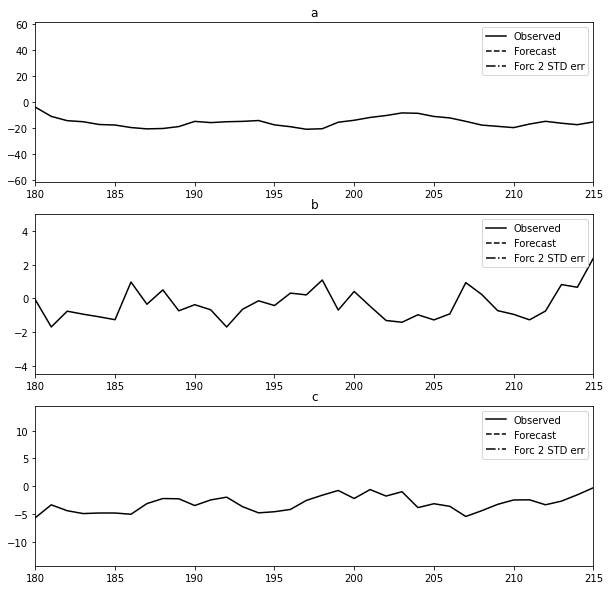

In [269]:
# dynamic forecast 10 steps forward plot
results.plot_forecast(10)
plt1 = plt. subplot (311)
plt1.set_xlim(180,215)
plt2 = plt.subplot (312)
plt2.set_xlim(180,215)
plt3 = plt.subplot (313)
plt3.set_xlim(180,215)
plt.show()

Que - 2  

Read in the series 'X.csv', 'Y.csv', 'Z.csv'

In [270]:
x = pd.read_csv('X.csv',names = ['0','x'])
y = pd.read_csv('Y.csv',names = ['0','y'])
z = pd.read_csv('Z.csv',names = ['0','z'])

In [271]:
x = x.drop(x.columns[0], axis=1)
y = y.drop(y.columns[0], axis=1)
z = z.drop(z.columns[0], axis=1)


In [272]:
df = pd.concat([x,y,z],axis = 1)
df.head()

,x,y,z
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,-1.690123,-0.809757,0.420383
4,-1.298689,-2.972061,-0.759944


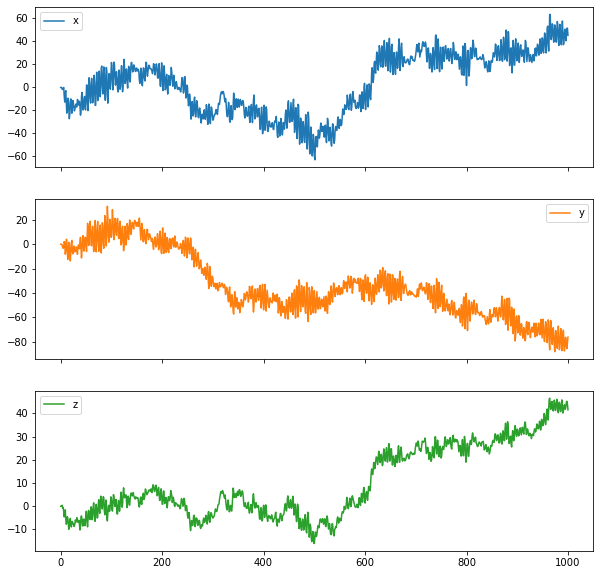

In [273]:
df.plot(subplots = True, layout = (3,1), figsize = (10,10))
plt.show()

Determine optimum lag order (p) by Lag order selection

In [274]:
#make a VAR model
model = sm.tsa.VAR(df)

#lag order selection
lag_order = model.select_order(15)

print()
print(lag_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        15.65       15.66   6.261e+06       15.66
1        3.531       3.591       34.17       3.554
2     0.02214*     0.1264*      1.022*    0.06178*
3      0.03290      0.1818       1.033     0.08953
4      0.04344      0.2370       1.044      0.1171
5      0.05248      0.2907       1.054      0.1431
6      0.06394      0.3468       1.066      0.1715
7      0.07487      0.4024       1.078      0.1995
8      0.08987      0.4621       1.094      0.2314
9       0.1001      0.5170       1.105      0.2587
10      0.1003      0.5619       1.106      0.2759
11      0.1107      0.6169       1.117      0.3032
12      0.1222      0.6731       1.130      0.3318
13      0.1295      0.7251       1.138      0.3560
14      0.1390      0.7793       1.149      0.3825
15      0.1403      0.8252       1.151      0.4008
------------------------------

Here, lowest AIC, BIC, FPE and HQIC are in VAR order 2. So, from lag order selection we can say that the optimum lag order is <b>order 2<b>


Model fit at optimum lag order and get results

In [275]:
#Fitting the model
results = model.fit(2)
print()
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, May, 2023
Time:                     20:10:22
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.140282
Nobs:                     999.000    HQIC:                 0.0763409
Log likelihood:          -4250.11    FPE:                    1.03784
AIC:                    0.0371367    Det(Omega_mle):         1.01632
--------------------------------------------------------------------
Results for equation x
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.068555         0.053149           -1.290           0.197
L1.x          0.703154         0.008201           85.736           0.000
L1.y          0.224388         0.029630            7.573           0.000
L1.z          2.023226

Use results to find roots (number of roots = K*p)

In [276]:
num_variables = df.shape[1]
nroots = num_variables * lag_order.aic #3*2
print()
print('Roots = ')
for i in range(0,nroots):
    print(results.roots[i])
print()
print('Moduli = ')
for i in range(0,nroots):
    print(np.absolute(results.roots[i]))


Roots = 
(21.584304495714765-0j)
(2.295832849493078-0j)
(0.28859760235697635+0.9886262887725785j)
(0.28859760235697635-0.9886262887725785j)
(1.0042932939104974-0j)
(0.999302695793288-0j)

Moduli = 
21.584304495714765
2.295832849493078
1.0298885934597184
1.0298885934597184
1.0042932939104974
0.999302695793288


Here, We can say that model<b> is not staionary </b>as not all moduli are greter than one.

Also, 5th and 6th ≈ 1 so we can say that the model <b>is cointergrated</b>

If cointegrated:
- Perform a Johansen cointegration test. What is the cointegration rank? 
- Create a VECM model (with no deterministic terms) and fit
- What are the a and b matrices?

In [277]:
# Performing Johansen cointegration test
johansen_results = select_coint_rank(df, 0, 3, method = "trace", signif = 0.05)

print(johansen_results)

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          311.1          29.80
  1   3          2.762          15.49
-------------------------------------


In [278]:
print('Rank = ', johansen_results.rank)
print()

Rank =  1



Create a VECM model (with no deterministic terms) and fit

In [284]:
lag_order = select_order(data = df, maxlags=10, deterministic='nc')
print()
print(lag_order. summary())
print()
print ('AIC lag order =', lag_order. aic)
print()


 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.528       3.587       34.06       3.551
1     0.01673*     0.1206*      1.017*    0.05623*
2      0.02783      0.1762       1.028     0.08427
3      0.03822      0.2312       1.039      0.1116
4      0.04702      0.2845       1.048      0.1373
5      0.05774      0.3397       1.059      0.1650
6      0.06856      0.3951       1.071      0.1927
7      0.08330      0.4543       1.087      0.2244
8      0.09300      0.5086       1.098      0.2510
9      0.09281      0.5529       1.097      0.2678
10      0.1035      0.6081       1.109      0.2954
--------------------------------------------------

AIC lag order = 1



In [285]:
from statsmodels.tsa.vector_ar.vecm import *
model = VECM(df, deterministic="nc", seasons=0,
             k_ar_diff=lag_order.aic, 
             coint_rank=johansen_results.rank) 
vecm_res = model.fit()
print (vecm_res.summary ())
print ()
print ('Alpha =')
print (vecm_res.alpha)
print('Standard error on alpha =')
print(vecm_res.stderr_alpha)
print()

Det. terms outside the coint. relation & lagged endog. parameters for equation x
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.x           0.5314      0.027     19.658      0.000       0.478       0.584
L1.y          -0.1870      0.017    -10.939      0.000      -0.221      -0.154
L1.z           0.3653      0.077      4.772      0.000       0.215       0.515
Det. terms outside the coint. relation & lagged endog. parameters for equation y
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.x           0.3405      0.026     12.927      0.000       0.289       0.392
L1.y           0.2365      0.017     14.196      0.000       0.204       0.269
L1.z          -0.4886      0.075     -6.553      0.000      -0.635      -0.342
Det. terms outside the coint. relation & lagged 

What are the α and β matrices?

In [281]:
vecm_res.alpha

array([[-0.82806147],
       [ 0.5785917 ],
       [-0.23581454]])

In [282]:
vecm_res.beta

array([[ 1.        ],
       [-0.49952405],
       [-2.000714  ]])

For 
VECM model, perform a dynamic forecast 10 steps forward and plot

forecast:
[[ 39.9615332  -75.91121098  42.34857073]
 [ 43.03161751 -81.9876221   44.03728966]
 [ 49.82762548 -85.58794554  44.17523802]
 [ 50.68590667 -81.76329636  42.66632223]
 [ 44.77012499 -76.26196758  41.71947122]]
lower:
[[ 37.97079845 -77.85088335  40.39316368]
 [ 38.36468669 -86.51076662  40.64749042]
 [ 41.34790956 -91.87193121  40.04517805]
 [ 40.42639849 -88.56329148  38.30848489]
 [ 34.19259283 -83.87067545  37.16263183]]
upper:
[[ 41.95226794 -73.97153861  44.30397778]
 [ 47.69854834 -77.46447758  47.42708891]
 [ 58.30734139 -79.30395987  48.30529799]
 [ 60.94541485 -74.96330124  47.02415956]
 [ 55.34765716 -68.65325971  46.27631062]]


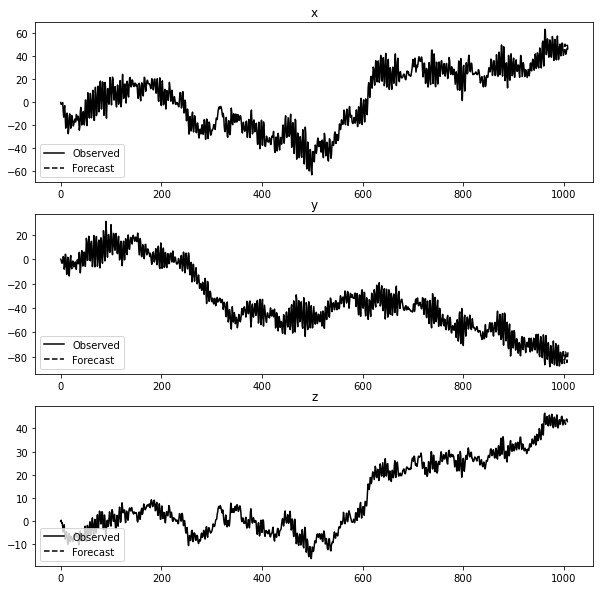

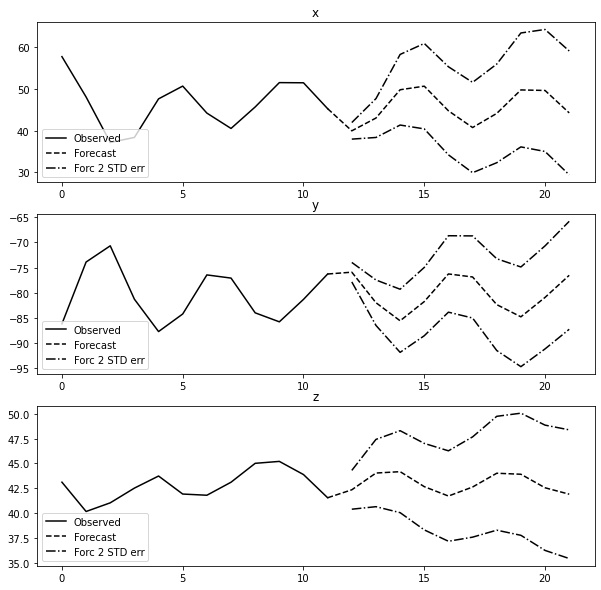

In [283]:
vecm_res.predict(steps=10, alpha=0.05)
for text, values in zip(("forecast", "lower", "upper"),
                        vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", values, sep="\n")
vecm_res.plot_forecast(steps=10, plot_conf_int=False)
vecm_res.plot_forecast (steps=10, n_last_obs=12)
plt.show()